# Session 5 : Unsupervised learning

## Preprocessing data

We saw that PCA can be used as a pre-processing step before using supervised learning algorithms in order to improve accuracy or training speed. But sometimes, a simple pre-processing step like normalizing the data can bring a huge improvement.

### No normalization

Before seing any improvements, we need to have a **baseline** (to know if we improve or deteriorate accuracy). We are going to train a classification SVM (with non-linear kernel). Do the following operations :
* load the bread cancer dataset
* separate it into a training and a test set
* create a SVC model, with C=100
* train your model, print its accuracy

I know that you already did it in the last session, but try to see if you can do it again on your own, without any code snippet provided or looking at the correction.

In [5]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=0)

from sklearn.svm import SVC
model = SVC(C=100)

model.fit(X_train, y_train)
print("trained SVM with C=100")
print(" | score on train set:", model.score(X_train, y_train))
print(" | score on test set:", model.score(X_test, y_test))

trained SVM with C=100
 | score on train set: 1.0
 | score on test set: 0.6293706293706294


### Using built-in normalizers

Let's see what our data looks like before normalization. For each feature, print its minimum and maximum value across all examples in training set.

In [43]:
import numpy as np, pandas as pd
for feature, mi, ma in zip(np.array(dataset.feature_names), X_train.min(0), X_train.max(0)):
    print(feature,":")
    print(" | min:", mi)
    print(" | max:", ma)

mean radius :
 | min: 6.981
 | max: 28.11
mean texture :
 | min: 9.71
 | max: 33.81
mean perimeter :
 | min: 43.79
 | max: 188.5
mean area :
 | min: 143.5
 | max: 2501.0
mean smoothness :
 | min: 0.05263
 | max: 0.1447
mean compactness :
 | min: 0.01938
 | max: 0.3114
mean concavity :
 | min: 0.0
 | max: 0.4268
mean concave points :
 | min: 0.0
 | max: 0.2012
mean symmetry :
 | min: 0.106
 | max: 0.304
mean fractal dimension :
 | min: 0.04996
 | max: 0.09744
radius error :
 | min: 0.1115
 | max: 2.873
texture error :
 | min: 0.3628
 | max: 4.885
perimeter error :
 | min: 0.757
 | max: 21.98
area error :
 | min: 7.228
 | max: 542.2
smoothness error :
 | min: 0.001713
 | max: 0.02333
compactness error :
 | min: 0.002252
 | max: 0.1064
concavity error :
 | min: 0.0
 | max: 0.396
concave points error :
 | min: 0.0
 | max: 0.05279
symmetry error :
 | min: 0.007882
 | max: 0.06146
fractal dimension error :
 | min: 0.0008948
 | max: 0.02984
worst radius :
 | min: 7.93
 | max: 36.04
worst text

Now we can use a normalizer, to make sure that each feature has a value between 0 and 1.

In [50]:
from sklearn.preprocessing import MinMaxScaler

# look at the documentation of MinMaxScaler to find examples
# of use case. Then create a new variable X_train_scaled that
# is the rescaled X_train. Print again the maximum and
# minimum values in X_train_scaled for each features. What is
# the difference ?

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# verify 5 first features min and max
for feature, mi, ma in list(zip(np.array(dataset.feature_names), X_train_scaled.min(0), X_train_scaled.max(0)))[:5]:
    print(feature,":")
    print(" | min:", mi)
    print(" | max:", ma)
    
print("\nfeatures are now scaled")

mean radius :
 | min: 0.0
 | max: 1.0
mean texture :
 | min: 0.0
 | max: 1.0
mean perimeter :
 | min: 0.0
 | max: 1.0
mean area :
 | min: 0.0
 | max: 0.9999999999999999
mean smoothness :
 | min: 0.0
 | max: 1.0

features are now scaled


Use the same scaler (without modifying it) to also rescale the `X_test` variable.

In [51]:
X_test_scaled = scaler.transform(X_test)

Train again a SVC model, but this time train it on the scaled data. Do you see any improvements ?

In [52]:
model = SVC(C=100)

model.fit(X_train_scaled, y_train)
print("trained SVM with C=100")
print(" | score on train set:", model.score(X_train_scaled, y_train))
print(" | score on test set:", model.score(X_test_scaled, y_test))

trained SVM with C=100
 | score on train set: 0.9859154929577465
 | score on test set: 0.965034965034965


Many more different types of scaler are implemented in scikit-learn :
* MaxAbsScaler
* RobustScaler
* StandardScaler

In [56]:
# use each type of scaler and train a SVC model for each one.
# Which one is the best ?

def scale_fit_and_score(scaler_class, model_class, X_train, X_test, y_train, y_test, *args, **kwargs):
    print("scaling train and test inputs according to train inputs using", scaler_class.__name__)
    scaler = scaler_class()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("building {} model with {} parameters:".format(model_class.__name__, len(args) + len(kwargs)),
          *["arg {} = {}".format(i, args[i]) for i in range(len(args))],
          *["{} = {}".format(kwarg, kwargs[kwarg]) for kwarg in kwargs])
    model = model_class(*args, **kwargs)
    model.fit(X_train_scaled, y_train)
    print(" | score on train set:", model.score(X_train_scaled, y_train))
    print(" | score on test set:", model.score(X_test_scaled, y_test))
    return {"model": model, "scaled X_train": X_train_scaled, "scaled X_test": X_test_scaled}

from sklearn.preprocessing import MaxAbsScaler, RobustScaler, StandardScaler
for scaler_class in [MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler]:
    scale_fit_and_score(scaler_class, SVC, X_train, X_test, y_train, y_test, C=100)

scaling train and test inputs according to train inputs using MinMaxScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 0.9859154929577465
 | score on test set: 0.965034965034965
scaling train and test inputs according to train inputs using MaxAbsScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 0.9859154929577465
 | score on test set: 0.972027972027972
scaling train and test inputs according to train inputs using RobustScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 1.0
 | score on test set: 0.951048951048951
scaling train and test inputs according to train inputs using StandardScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 1.0
 | score on test set: 0.958041958041958


**Answer:** MaxAbsScaler is the best here

In [65]:
# look also at the features of your scaled dataset to see
# differences between the different scalers (do some of
# them keep negative values ? does it change the dimension
# mean/median?)

for scaler_class in [MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler]:
    # get scaled X_train features
    features = scale_fit_and_score(scaler_class, SVC, X_train, X_test, y_train, y_test, C=100)["scaled X_train"]
    # print a few of them (5 first)
    for name, mi, ma, mean, med in list(zip(np.array(dataset.feature_names), features.min(0), features.max(0),
                                            np.mean(features, axis=0), np.median(features, axis=0))
                                       )[:5]:
        print(" |", name,":")
        print(" |  | min:", mi)
        print(" |  | max:", ma)
        print(" |  | mean:", mean)
        print(" |  | median:", med)

scaling train and test inputs according to train inputs using MinMaxScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 0.9859154929577465
 | score on test set: 0.965034965034965
 | mean radius :
 |  | min: 0.0
 |  | max: 1.0
 |  | mean: 0.3397307663165482
 |  | median: 0.3026172559042075
 | mean texture :
 |  | min: 0.0
 |  | max: 1.0
 |  | mean: 0.39514542302222755
 |  | median: 0.3775933609958506
 | mean perimeter :
 |  | min: 0.0
 |  | max: 1.0
 |  | mean: 0.334143436622314
 |  | median: 0.29369082993573353
 | mean area :
 |  | min: 0.0
 |  | max: 0.9999999999999999
 |  | mean: 0.21841570454896214
 |  | median: 0.17353128313891836
 | mean smoothness :
 |  | min: 0.0
 |  | max: 1.0
 |  | mean: 0.47502971560218216
 |  | median: 0.47056587379168024
scaling train and test inputs according to train inputs using MaxAbsScaler
building SVC model with 1 parameters: C = 100
 | score on train set: 0.9859154929577465
 | score on test set: 0.972027972027972
 | mean radiu

**Answer:** StandardScaler and RobustScaler keep negative values.
- MinMax : min and max alignment
- MaxAbs : max(|x|) alignment
- Robust : median alignment,...
- Standard : mean alignment,...

## Principal component analysis

### PCA for 2D visualization

We are going use the PCA algorithm on the breast cancer dataset. This dataset has 30 features, so we can not visualize them.

In [67]:
# if you didn't do it before, scale the breast cancer
# dataset with a StandardScaler(). We do not need to have a
# training and test set, because we want to visualize the 
# entire dataset, so you can apply the scaler on the entire
# dataset.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

X = load_breast_cancer().data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [71]:
# now we can use PCA
from sklearn.decomposition import PCA

# use the documentation of PCA to create a model that will
# only keep 2 components
pca = PCA(n_components=2)

# then call the .fit() method of PCA on your scaled data
pca.fit(X_scaled);

In [72]:
# we can now transform the dataset with 30 features into
# a dataset with only 2 features
X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


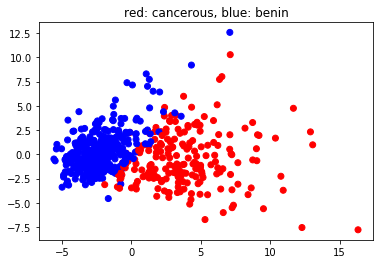

In [108]:
# now plot the new dataset (the one with only 2 features)
# on a 2D plan. Use a different color for the two classes.
from matplotlib import pyplot as plt
%matplotlib inline
y = load_breast_cancer().target
plt.scatter(X_pca[:,0], X_pca[:,1], c=["blue" if label==1 else "red" for label in y])
plt.title("red: cancerous, blue: benin");

Hum, interesting... It looks like our
dataset is almost linearly separable. This means that a
linear model (like SVM with linear kernel or logistic regression) could do quite well on this dataset. Let's see if that's the case.

In [ ]:
# start by splitting the X_pca dataset into a training
# and a test set with random_state=7 (because we are going 
# to train on this new dataset composed of only 2 features)

### PCA for 3D visualization

PCA can reduce any dataset with $n$ features into a dataset with 2 or 3 features. And matplotlib can draw functions and points in 3D, so we can project our data into a 3D space.

In [ ]:
# repeat the same process as before so you get a new
# dataset for the breast cancer dataset that only contains 
# 3 features.

Now we can visualize it in 3D.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# use the function below, but replace the value x, y and z
# with the appropriate one from your dataset that contains
# 3 features. Separate the 2 different classes with 2 
# different colors.
#ax.scatter(x, y, z)

## Clustering with k-means algorithm

In this part, you are going to implement from scratch the k-means algorithm.

### Loading and visualizing the data

The data we are going to use are inside `data-clustering.csv`.

In [ ]:
# look at the first 10 rows of this file with the bash
# command head

It seems that we have 2 columns, named V1 and V2. Let's load it into 2 ndarrays : x and y.

In [ ]:
import numpy as np
lines = open("data_clustering.csv").read().split()[1:]
x = np.array([line.split(',')[0] for line in lines], 
             dtype=np.float32)
y = np.array([line.split(',')[1] for line in lines], 
             dtype=np.float32)

In [ ]:
# now plot the points (x, y) with matplotlib. Modify the 
# value of the argument s so that points are not too big.

In [ ]:
# How many clusters do you think there are ?

### Distance function

The algorithm requires a distance (so we can compute which centroid is closer for each point). Implement a function `distance` that takes 2 arguments (two vectors as ndarray) and return the distance between them. Hint : the distance between two vectors can be computed with 
\begin{equation}
d(u, v) = \sqrt{\sum_{i=0}^k (u_i - v_i)^2}
\end{equation}

### Algorithm: 1-step

Before implementing the complete algorithm, let's start with only one step. You need the following things before starting :
* define a constant variable K
* declare an empty array `clusters` that has the same size as x. We will put in each cell $i$ the cluster assigned to $x_i$
* create an array `centroids` where you will store the centroids

Then implement only one step from the algorithm described in the course (i.e. one iteration of the **while** loop).

After running one iteration, you can plot on the same graph :
* all points
* the first centroids chosen at random
* the new updated centroids

Do you see the beginning of an improvement ?

### Algorithm : mutiple steps

The algorithm will repeat steps like the one you created a certain amount of time before convergence. We can consider the algorithm has converged when it does not update the values of centroids any longer (i.e. the distance between old and updated centroids is 0 for each centroid). Implement the full algorithm.

Now, print each cluster on a 2D plan as well as all the points contained inside them. Assign a different color for each group. Do you see something that seems correct ? (i.e. as a human, what would have you done ?)

Run again your algorithm but with a different value for k. What happens ? Do you think it is a good idea to put a high value for k (k > 10) when the number of clusters is small (< 5) ?